In [24]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [25]:
image_directory = './train/shapes_train2018/'
annotation_file = './train/annotations/instances_shape_train2018.json'

In [26]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [27]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
square circle triangle

Custom COCO supercategories: 
shape


In [28]:
category_ids = example_coco.getCatIds(catNms=['triangle'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [29]:
image_data

{u'coco_url': u'',
 u'date_captured': u'2018-04-13 03:25:06.134240',
 u'file_name': u'1276.jpeg',
 u'flickr_url': u'',
 u'height': 128,
 u'id': 415,
 u'license': 1,
 u'width': 128}

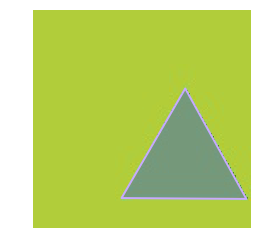

In [30]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)